<a href="https://colab.research.google.com/github/joseluisnaranjo/QuasiPhaseEquilibrium/blob/master/Multioutput_QuiasiPhaseEquilibrium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lanzhou University Of Tehcnology**
[LUT website](https://www.lut.edu.cn/)

![texto alternativo](![](https://https://statnano.com/resource/amar_university_world/files/images/21/1/thumbnail_5e805feba49b7b25e489d511fe246791.jpg))

# **Improving** the fast prediction of the quasi phase equilibrum in phase field model for multicomponet alloys. 

We aim to improve the phase field model for multicomponent alloys introduced by **Xue Jiang** et al., In the published pair they provide the data used to obtain the obtained results, there for we are using the same data set in order to have evidence that our Neural Network model for the fast prediction od the quasi phase euilibrium. We propose a robust NN wich incorporates several layers including convolutional and pulling layers. 

As a forst step, we are going to load the data as following: 

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Data50Test.csv to Data50Test.csv
User uploaded file "Data50Test.csv" with length 10825 bytes


In [0]:
from numpy import genfromtxt
my_training_data = genfromtxt('Data200K.csv', delimiter=',')
my_test_data = genfromtxt('Data50Test.csv', delimiter=',')
training_inputdata = my_training_data[1:,0:3]
training_outputdata = my_training_data[1:,3]
test_inputdata = my_test_data[1:,0:3]
test_outputdata = my_test_data[1:,3]

In [4]:
import numpy as np
from numpy import  newaxis

training_input = training_inputdata[:,:,newaxis]
training_output = training_outputdata
test_input = test_inputdata[:,:,newaxis]
test_output = test_outputdata
print (training_input.shape)
print (training_output.shape)
print (test_input.shape)
print (test_output.shape)

(200000, 3, 1)
(200000,)
(100, 3, 1)
(100,)



Let's start with our import of TensorFlow

In [6]:
import tensorflow as tf
print(tf.__version__)

1.15.0


Notice that all of the values in the number are already between 0 and 1. If we are training a neural network, for various reasons it's easier if we treat all values in this range, a process called **normalization**'...and fortunately in Python it's easy to normalize a list like this without looping. 

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 
In our design we will be playing with the number of layers and the number of newrons that will have each one, however the inicial values will be taking from a teoretical analisys that will be shown in a separe file in the GitHub directory.

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(4, activation=tf.nn.relu)])

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

Train on 200000 samples, validate on 100 samples
Epoch 1/8
200000/200000 [==============================] - 10s 50us/sample - loss: 2.6993e-04 - acc: 0.4204 - val_loss: 2.2872e-04 - val_acc: 0.5200
Epoch 2/8
200000/200000 [==============================] - 10s 48us/sample - loss: 2.4439e-04 - acc: 0.4330 - val_loss: 2.1807e-04 - val_acc: 0.4500
Epoch 3/8
200000/200000 [==============================] - 10s 49us/sample - loss: 2.4125e-04 - acc: 0.4016 - val_loss: 2.2356e-04 - val_acc: 0.5600
Epoch 4/8
200000/200000 [==============================] - 10s 49us/sample - loss: 2.3363e-04 - acc: 0.3428 - val_loss: 2.1635e-04 - val_acc: 0.1600
Epoch 5/8
200000/200000 [==============================] - 10s 48us/sample - loss: 2.3207e-04 - acc: 0.2792 - val_loss: 2.2291e-04 - val_acc: 0.2200
Epoch 6/8
200000/200000 [==============================] - 9s 47us/sample - loss: 2.3152e-04 - acc: 0.2687 - val_loss: 2.2313e-04 - val_acc: 0.1400
Epoch 7/8
200000/200000 [==============================] -

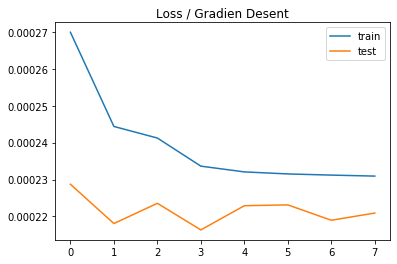

In [35]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'mean_squared_error',
              metrics=['accuracy'])

history = model.fit(training_input, training_output, validation_data=(test_input, test_output), epochs=8)
#model.evaluate(test_input, test_output)

classifications = model.predict(test_input)

print(classifications[0])
print(test_output[0])

# plot loss during training
from matplotlib import pyplot
pyplot.title('Loss / Adam Optimizer')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# plot loss during training


Train on 200000 samples, validate on 100 samples
Epoch 1/5
200000/200000 [==============================] - 12s 62us/sample - loss: 8.2645e-04 - acc: 0.2704 - val_loss: 2.1062e-04 - val_acc: 0.1400
Epoch 2/5
200000/200000 [==============================] - 12s 61us/sample - loss: 2.3276e-04 - acc: 0.2651 - val_loss: 2.1279e-04 - val_acc: 0.2000
Epoch 3/5
200000/200000 [==============================] - 12s 61us/sample - loss: 2.3131e-04 - acc: 0.2565 - val_loss: 2.0937e-04 - val_acc: 0.3300
Epoch 4/5
200000/200000 [==============================] - 13s 63us/sample - loss: 2.3034e-04 - acc: 0.2491 - val_loss: 2.1614e-04 - val_acc: 0.3000
Epoch 5/5
200000/200000 [==============================] - 14s 68us/sample - loss: 2.3050e-04 - acc: 0.2654 - val_loss: 2.0840e-04 - val_acc: 0.2800
[0.04429241 0.04498215 0.04499772 0.04527765]
0.033955185


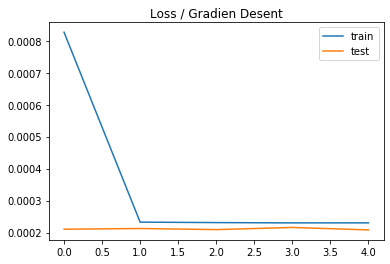

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'mean_squared_error',
              metrics=['accuracy'])

history = model.fit(training_input, training_output, validation_data=(test_input, test_output), epochs=5)
#model.evaluate(test_input, test_output)

classifications = model.predict(test_input)

print(classifications[0])
print(test_output[0])

# plot loss during training
from matplotlib import pyplot
pyplot.title('Loss / Gradien Desent')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# plot loss during training


Finally, is presented a summary of the architecture implemented of the model.

In [0]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  256       
_________________________________________________________________
dense_13 (Dense)             multiple                  8320      
_________________________________________________________________
dense_14 (Dense)             multiple                  516       
Total params: 9,092
Trainable params: 9,092
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
training_inputdata = my_training_data[1:,0:3]
training_outputdata = my_training_data[1:,3:7]
test_inputdata = my_test_data[1:,0:3]
test_outputdata = my_test_data[1:,3:7]
print (training_inputdata.shape)
print( training_outputdata.shape)
print (test_inputdata.shape)
print(test_outputdata.shape)

(200000, 3)
(200000, 4)
(100, 3)
(100, 4)


Train: 0.930, Test: 0.960


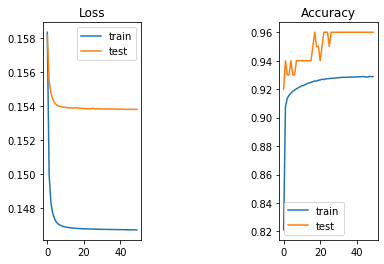

[0.31238186 0.10197537 0.5153683  0.07027449]
[0.03395518 0.01039399 0.03820949 0.00379846]


In [100]:
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset

trainX = training_inputdata
testX = test_inputdata
trainy = training_outputdata
testy = test_outputdata


# define model
model = Sequential()
model.add(Dense(128, input_dim=3, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=50, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(131)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(133)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

pyplot.show()
classifications = model.predict(testX)
print(classifications[0])
print(testy[0, :])